# Naive Bayes algorithm

Suppose that we are going to predict the value of a response (class) variable (say $Y$) given the observations of some explanatory variables. Suppose further that

- a) Our explanatory variables, say $X_1,\ldots,X_k$ are all some categorical random variables.
- b) Given $Y = y$, the random variables $X_1,\ldots,X_k$ are independent 
- c) Our response variable takes its values among $\{y_1, \ldots, y_c\}$, as a result, it is a categorical random variable too. 

Now, if we are given a new observation $(X_1 = x_1, \ldots, X_k = x_k)$, then, the Naive Bayes prediction of $y$ will be chosen from the set $\{y_1, \ldots, y_c\}$ such that it maximizes the following conditional probability

$$\Pr(Y = y~|~X_1 = x_1, \ldots, X_k = x_k).$$

> The above probability is called the **posterior probability** which refers to the probability of a particular class given the observed evidence or features. It can not be solved directly, but using the Bayes formula we can calculate it as
\begin{eqnarray}
\Pr(Y = y_i~|~X_1 = x_1, \ldots, X_k = x_k) &=& \frac{\Pr(X_1 = x_1, \ldots, X_k = x_k~|~Y = y_i)\Pr(Y = y_i)}{\Pr(X_1 = x_1, \ldots, X_k = x_k)}\nonumber\\
&=&\frac{\Pr(Y = y_i)\prod_{j = 1}^k \Pr(X_j = x_j|~Y = y_i)}{\prod_{j = 1}^k\Pr(X_j = x_j)}, \qquad i = 1,\ldots, c.
\end{eqnarray}

> The term $\Pr(Y = y_i)$ given by the numerator is called the **prior probability** which is the probability of a particular class or category _before_ considering any evidence or features.

> The term $\Pr(X_1 = x_1, \ldots, X_k = x_k~|~Y = y_i)$ of the numerator is also called the **likelihood** which is the probability of observing a particular feature given a specific class.

Since the denominator of the above fraction is the same for all $y_i$, $i = 1,\ldots,c$, we only compute the numerator for every $y_i$.


## Using the Naive Bayes for email filteration

The problem of classifying emails as spam or inbox is a common example used to illustrate the Naive Bayes algorithm. The goal is to develop a model that automatically determines whether an incoming email is spam or belongs to the inbox.

### Example 1

Consider the `SMSSpamCollection.txt` data set given by UCI machine learning repository. It is real data on a public set of SMS-labeled messages collected for mobile phone spam research. 
- a) Using the tools learnt in the text mining, clean the data and then plot the `wordcloud` of them for the entire messages, the ham messages and the spam messages.
- b) Fit the Naive Bayes model on the cleaned data and then obtain the accuracy of the model.
- c) If the model works well, then predict the destination of the following new messages:

```
new_message_01 = "Hi, are u ok?"
new_message_02 = "Will u be available tomorrow to help me in my homework?"
new_message_03 = "Please call me if you are free."

```

In [1]:
# Importing the data 
import os
import pandas as pd

os.chdir("/Users/marcusnkadimeng/Downloads/stk353/Notes/Machine Learning/16 Oct")

sms_data = pd.read_csv("SMSSpamCollection.txt", sep="\t", names=("type", "message"))
sms_data

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


> a) For the wordcloud, first we need to clean the text data. In addition to the previous removals, we must also remove the numbers here:

In [2]:
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

txt = sms_data.message

# Step 1:  Convert the text to lowercase
txt_lo = txt.str.lower()

# Step 2: Removing punctuation and numbers
def rm_punctuation(row):
    return row.translate(row.maketrans('', '', string.punctuation + string.digits))  # string.digits involves the numbers as well

txt_wo_punc = txt_lo.apply(lambda x: rm_punctuation(x))

# Step 3: Removing stopwords
from nltk.corpus import stopwords

x = stopwords.words('english')
STOPWORDS = set(x)
def rm_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

txt_wo_stwd = txt_wo_punc.apply(lambda x: rm_stopwords(x))

# Step 4: Stemming or lemmatization
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def stemfunc(row):
    token = word_tokenize(row)
    pst = PorterStemmer()
    return " ".join([pst.stem(x) for x in token])

txt_stem = txt_wo_stwd.apply(lambda x: stemfunc(x))
txt_stem

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    nd time tri contact u u £ pound prize claim ea...
5568                              ü b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [4]:
sms_data["message"] = txt_stem

In [5]:
# concatenate the messages:
y = sms_data["type"]

final_txt_entire = ''
for i in sms_data.message.index:
    final_txt_entire = final_txt_entire + " " + sms_data.message[i]

final_txt_ham = ''
for i in sms_data.message[y == "ham"].index:
    final_txt_ham = final_txt_ham + " " + sms_data.message[y == "ham"][i]

final_txt_spam = ''
for i in sms_data.message[y == "spam"].index:
    final_txt_spam = final_txt_spam + " " + sms_data.message[y == "spam"][i]

In [6]:
# The number of characters
len(final_txt_entire), len(final_txt_ham), len(final_txt_spam)

(270890, 208316, 62574)

In [8]:
# The number of words
len(final_txt_entire.split()), len(final_txt_ham.split()), len(final_txt_spam.split())

(50489, 39529, 10960)

In [9]:
from nltk.probability import FreqDist
fdist = FreqDist(word_tokenize(final_txt_entire))
fdist.most_common(20)

[('u', 1157),
 ('call', 657),
 ('im', 467),
 ('go', 456),
 ('get', 451),
 ('ur', 390),
 ('come', 300),
 ('dont', 287),
 ('ok', 278),
 ('free', 278),
 ('ltgt', 276),
 ('£', 274),
 ('know', 270),
 ('like', 257),
 ('day', 256),
 ('got', 252),
 ('love', 249),
 ('want', 245),
 ('ill', 241),
 ('time', 239)]

Text(0.5, 1.0, 'spam')

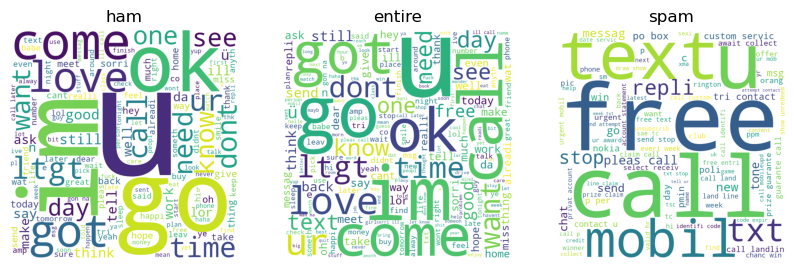

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud_entire = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 15).generate(final_txt_entire)

wordcloud_ham = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 15).generate(final_txt_ham)

wordcloud_spam = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 15).generate(final_txt_spam)

# plot the WordCloud image                      
plt.figure(figsize = (10, 15), facecolor = None)

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_ham)
plt.axis("off")
plt.title("ham")

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_entire)
plt.axis("off")
plt.title("entire")

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_spam)
plt.axis("off")
plt.title("spam")

> b) Before solving part (b) of the question, we need to understand what a 'document-term matrix' is and how can it be created from a row document.

In [10]:
# CountVectorizer() method converts a collection of text documents to a matrix of token counts which is called "document-term matrix".

from sklearn.feature_extraction.text import CountVectorizer

# Training data
train_documents = [
    "The first document.",
    "The second document.",
    "The third one.",
    "Is this the first document?"
]

# Test data
test_documents = [
    "This is a new document.",
    "Any document for testing?"
]

# Initialize the CountVectorizer()
vectorizer = CountVectorizer()

# Learn the vocabulary and transform the training data
X_train = vectorizer.fit_transform(train_documents)
# Note: The fit_transform() method is used for both learning the vocabulary dictionary and transforming the raw documents
# into a document-term matrix. It should be used on the training data. 

# Transform the test data using the learned vocabulary
X_test = vectorizer.transform(test_documents)
# Note: The transform() method is used to transform new raw documents into a document-term matrix based on the vocabulary learned
# from the training data. It should be used for the test or new data. 

vectorizer.get_feature_names_out(), X_train.toarray(), X_test.toarray()

(array(['document', 'first', 'is', 'one', 'second', 'the', 'third', 'this'],
       dtype=object),
 array([[1, 1, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 1, 0, 1, 1, 0],
        [1, 1, 1, 0, 0, 1, 0, 1]]),
 array([[1, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0]]))

In [11]:
# Let's back to Part (b):

n = sms_data.shape[0]
n_train = int(n * 0.7)
n_train

3900

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Step 1: Cleaning the data: Already done :)

# Step 2: Split the data into training and testing sets

import numpy as np

np.random.seed(1001)
i = np.random.choice(sms_data.index, size = n, replace = False)
sms_data_train = sms_data.loc[i][ :n_train]
sms_data_test = sms_data.loc[i][n_train: ]

X_train = sms_data_train['message']
y_train = sms_data_train['type']

X_test = sms_data_test['message']
y_test = sms_data_test['type']

# Step 3: Obtaining the document-term matrix for both train and test datasets.

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train) # document-term matrix for training data sets
X_test_vectorized = vectorizer.transform(X_test) # document-term matrix for testing data sets

# Step 4: Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9802631578947368

In [14]:
# The result of the prediction for the train data set:
model.class_count_

array([3385.,  515.])

> c) Prediction of the classes of the new messages:

In [15]:
# Prediction

new_message_01 = "Hi, are u ok?"
new_message_02 = "Will u be available tomorrow to help me in my homework?"
new_message_03 = "Please call me if you are free."

new_message =  [new_message_01, new_message_02, new_message_03]
new_message_vectorized = vectorizer.transform(new_message)
model.predict(new_message_vectorized)

array(['ham', 'ham', 'spam'], dtype='<U4')